In [155]:
library(tidyverse)
library(tidymodels)
library(cowplot)

In [156]:
url <- "https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/School%20Grades/school_grades_dataset.csv"
math = read_csv(url)

Rows: 649 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [157]:
# Separating data into training and testing sets
math <- math |>  
        mutate(standing = ifelse(G3 >= 10, "pass", "fail")) |>
        mutate(sex = as_factor(sex), standing = as_factor(standing)) |>
        mutate(sex = fct_recode(sex, "Male" = "M", "Female" = "F"))
head(math)

math_split <- initial_split(math, prop = 0.75, strata = standing)
math_training <- training(math_split)
math_testing <- testing(math_split)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,standing
<chr>,<fct>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
GP,Female,18,U,GT3,A,4,4,at_home,teacher,⋯,3,4,1,1,3,4,0,11,11,pass
GP,Female,17,U,GT3,T,1,1,at_home,other,⋯,3,3,1,1,3,2,9,11,11,pass
GP,Female,15,U,LE3,T,1,1,at_home,other,⋯,3,2,2,3,3,6,12,13,12,pass
GP,Female,15,U,GT3,T,4,2,health,services,⋯,2,2,1,1,5,0,14,14,14,pass
GP,Female,16,U,GT3,T,3,3,other,other,⋯,3,2,1,2,5,0,11,13,13,pass
GP,Male,16,U,LE3,T,4,3,services,other,⋯,4,2,1,2,5,6,12,12,13,pass


`summarise()` has grouped output by 'G3'. You can override using the `.groups`
argument.


G3,standing,count
<dbl>,<fct>,<int>
0,fail,10
6,fail,3
7,fail,8
8,fail,25
9,fail,29
10,pass,74
11,pass,70
12,pass,63
13,pass,60


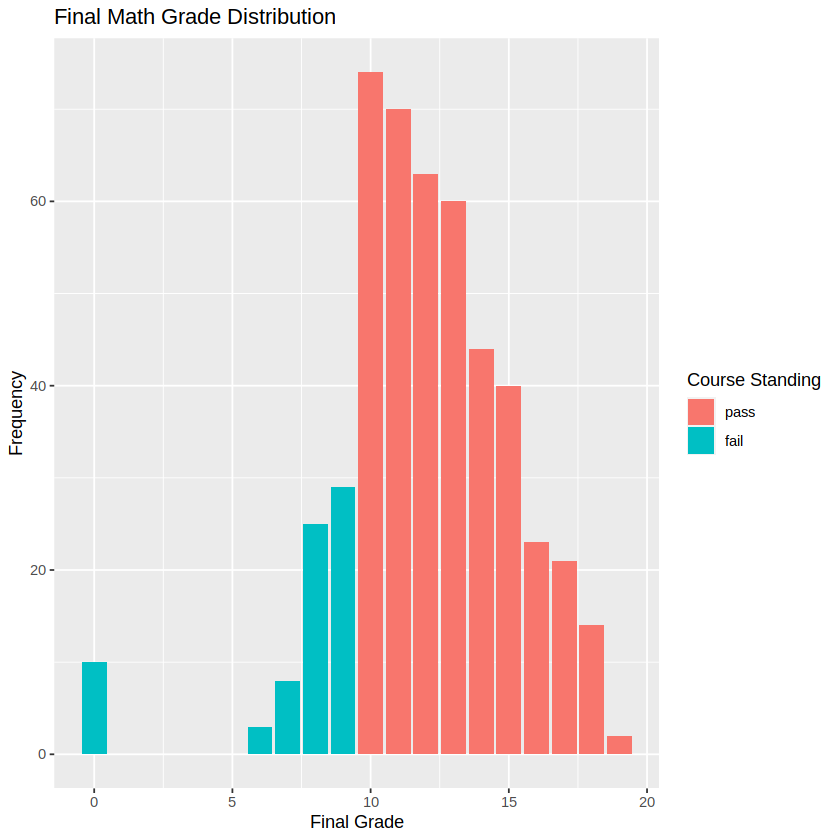

In [158]:
grade_distribution <- math_training |>
             group_by(G3, standing) |>
             summarize(count = n())
grade_distribution
grade_bar <- grade_distribution |>
             ggplot(aes(x = G3, y = count, fill = standing)) +
             geom_bar(stat = "identity") +
             labs(x = "Final Grade", y = "Frequency", fill = "Course Standing") +
             ggtitle("Final Math Grade Distribution")
grade_bar

In [159]:
male_female_proportion <- math_training |>
                            group_by(sex) |>
                            summarize(n = n())

male_female_proportion

sex,n
<fct>,<int>
Female,290
Male,196


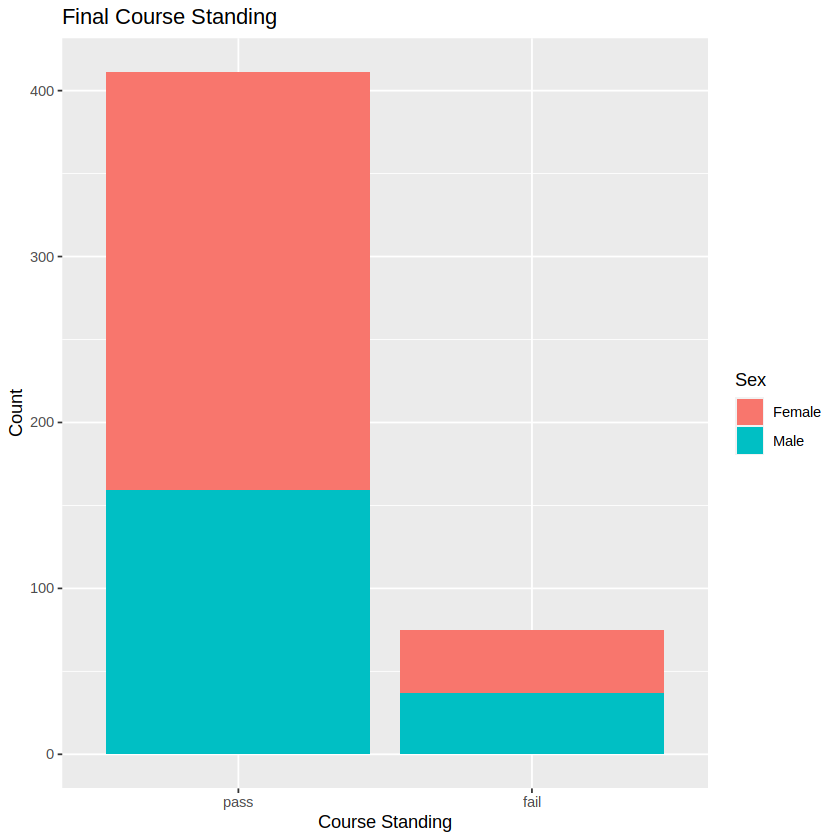

In [160]:
pass_plot <- math_training |>
            ggplot(aes(x = standing, fill = sex)) +
            geom_bar() +
            labs(x = "Course Standing", y = "Count", fill = "Sex") +
            ggtitle("Final Course Standing")
pass_plot

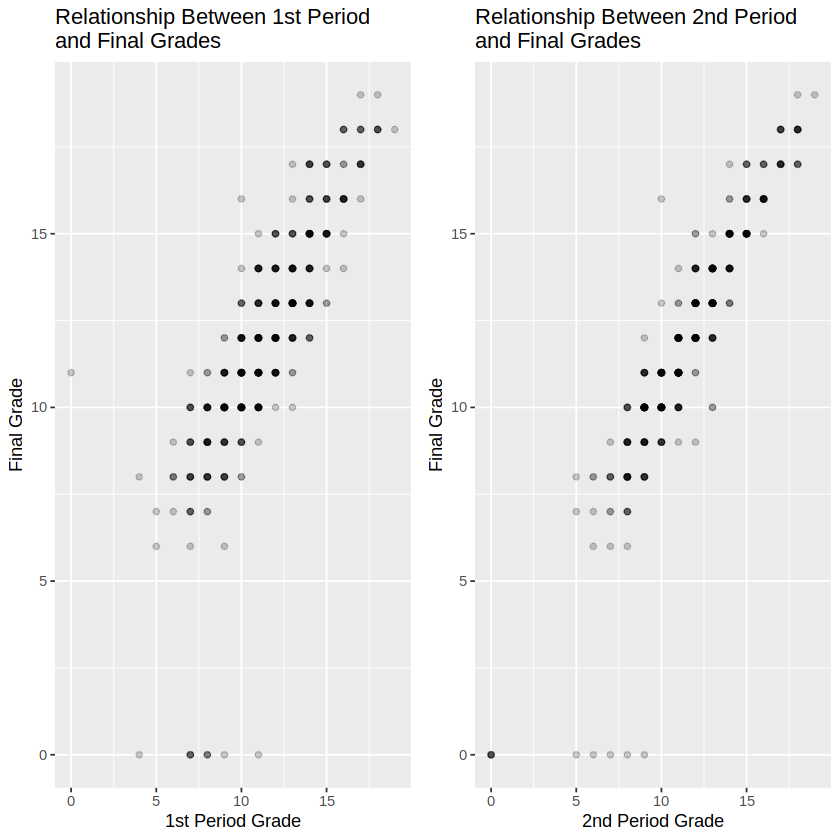

In [161]:
G1_G3_scatterplot <- math_training |>
                    ggplot(aes(x = G1, y = G3)) +
                    geom_point(alpha = 0.2) +
                    labs(x = "1st Period Grade", y = "Final Grade") +
                    ggtitle("Relationship Between 1st Period\nand Final Grades")

G2_G3_scatterplot <- math_training |>
                    ggplot(aes(x = G2, y = G3)) +
                    geom_point(alpha = 0.2) +
                    labs(x = "2nd Period Grade", y = "Final Grade") +
                    ggtitle("Relationship Between 2nd Period\nand Final Grades")

plot_grid(G1_G3_scatterplot, G2_G3_scatterplot)

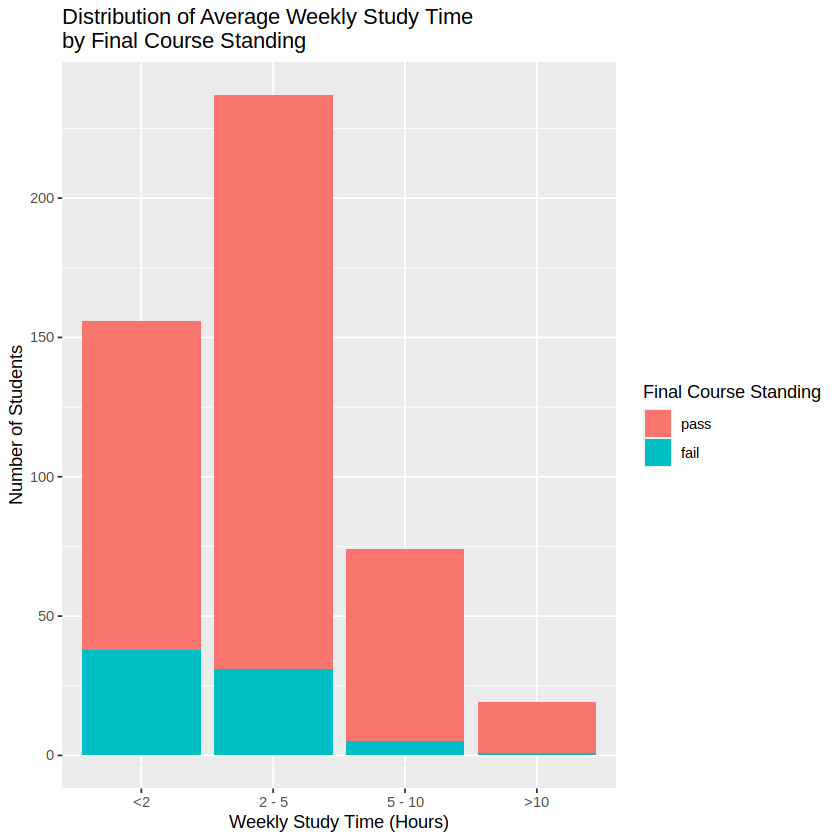

In [162]:
studytime_vs_grade_plot <- math_training |>
        mutate(studytime = as_factor(studytime)) |>
        mutate(studytime = fct_recode(studytime, "<2" = "1", "2 - 5" = "2", "5 - 10" = "3", ">10" = "4")) |>
        ggplot(aes(x = studytime, fill = standing)) +
        geom_bar() +
        labs(x = "Weekly Study Time (Hours)", y = "Number of Students", fill = "Final Course Standing") +
        ggtitle("Distribution of Average Weekly Study Time\nby Final Course Standing")
studytime_vs_grade_plot

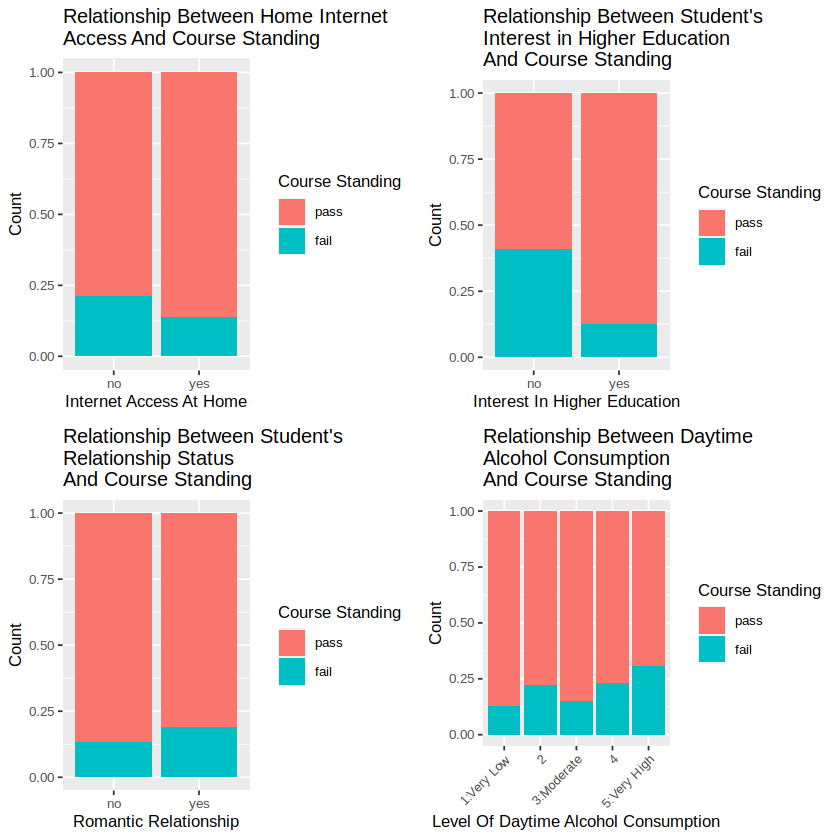

In [163]:
internet_grade <- math_training |>
                        ggplot(aes(x = internet, fill = standing)) +
                        geom_bar(position = "fill") +
                        labs(x = "Internet Access At Home", y = "Count", fill = "Course Standing") +
                        ggtitle("Relationship Between Home Internet\nAccess And Course Standing") +
                        theme(text= element_text(size = 10))
higher_grade <- math_training |>
                        ggplot(aes(x = higher, fill = standing)) +
                        geom_bar(position = "fill") +
                        labs(x = "Interest In Higher Education", y = "Count", fill = "Course Standing") +
                        ggtitle("Relationship Between Student's\nInterest in Higher Education\nAnd Course Standing") +
                        theme(text= element_text(size = 10))
relationship_grade <- math_training |>
                        ggplot(aes(x = romantic, fill = standing)) +
                        geom_bar(position = "fill") +
                        labs(x = "Romantic Relationship", y = "Count", fill = "Course Standing") +
                        ggtitle("Relationship Between Student's\nRelationship Status\nAnd Course Standing") +
                        theme(text= element_text(size = 10))
famsup_grade <- math_training |>
                        mutate(Dalc = as_factor(Dalc)) |>
                        mutate(Dalc = fct_recode(Dalc, "1:Very Low" = "1",
                                                 "2" = "2",
                                                 "3:Moderate" = "3",
                                                 "4" = "4",
                                                 "5:Very High" = "5")) |>
                        ggplot(aes(x = Dalc, fill = standing)) +
                        geom_bar(position = "fill") +
                        labs(x = "Level Of Daytime Alcohol Consumption", y = "Count", fill = "Course Standing") +
                        ggtitle("Relationship Between Daytime\nAlcohol Consumption\nAnd Course Standing") +
                        theme(axis.text.x = element_text(angle = 45, hjust = 1),
                              text = element_text(size = 10))
plot_grid(internet_grade, higher_grade, relationship_grade, famsup_grade)

**What do you expect to find?**

We want to find student achievement in Mathematics from the two Portuguese schools in the data given. For each student, this data set includes variables that could potentially affect course performance, such as relationships, health, commute time, weekly study time, and parent occupations. Therefore, we look forward to finding how different combinations of these variables contribute to a student's performance in math, and which circumstances are correlated with students getting unsatisfactory grades in our exploratory analysis. 

**What impact could such findings have?**

Our model will help us identify which students are predicted to pass the class. Using this information, we can identify students who are at risk of failing the class and take preventive measures to ensure the identified students get enough support in school to pass. This could be done through after-school tutoring or offering these students classes that go at a slower pace, etc.

**What future questions could this lead to?**

In the future, we could compare the results of student achievement in Portuguese with the results in Mathematics to see if there's a correlation between good grades in one subject and good grades in the other. We could predict whether the students with good grades in Mathematics and Portuguese have the same habits and traits. We could also figure out common study patterns in good students to make study tips to recommend students to follow in order to get good grades in those two subjects.
